<img src="https://www.th-koeln.de/img/logo.svg" style="float: right;" width="200">

# 8th exercise: <font color="#C70039">Fight overfitting in CNNs using data augmentation</font>
* Course: DIS21a.1
* Lecturer: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Author of notebook modifications and adaptations: <a href="https://www.gernotheisenberg.de/">Gernot Heisenberg</a>
* Date:   13.01.2023
* Name: Laura Fredrich
* Matrikelnr.: 11148559

<img src="https://miro.medium.com/max/700/1*bqNylp7FcqIBWg0DrcimUw.png" style="float: center;" width="600">

---------------------------------
**GENERAL NOTE 1**: 
Please make sure you are reading the entire notebook, since it contains a lot of information about your tasks (e.g. regarding the set of certain paramaters or specific computational tricks, etc.), and the written mark downs as well as comments contain a lot of information on how things work together as a whole. 

**GENERAL NOTE 2**: 
* Please, when commenting source code, just use English language only. 
* When describing an observation (for instance, after you have run through your test plan) you may use German language.
This applies to all exercises in DIS 21a.1.  

---------------------

### <font color="ce33ff">DESCRIPTION</font>:

This notebook allows for learning how you effectively fight overfitting when using convolutional neural networks (CNN) with small data sets. Training an image classification model using only very little data is a very common situation whenever working in computer vision within a professional context.

It is not possible to train a CNN to solve a complex problem with just a few tens of samples, but a few hundreds can 
potentially suffice if the model is small and well-regularized and if the task is simple. 

Because CNNs learn local, translation-invariant features, they are very data-efficient on perceptual problems. 
Training a CNN from scratch on a very small image dataset will still yield reasonable results despite a relative lack of data, without the need for any custom feature engineering. You will see this in action in this exercise.

This exercise focuses on classifying images as "dogs" or "cats", in a dataset containing 4000 pictures of cats and dogs (2000 cats, 2000 dogs). 2000 pictures are used for training, 1000 for validation, and finally 1000 for testing.

For the start, a small CNN is going to be trained on 2000 training samples, without any regularization for getting a performance baseline (classification accuracy). It will become obvious quite quickly that the main issue is overfitting. 
Then, *data augmentation* is going to be used, as you have learned it to be a powerful technique for fighting overfitting in computer vision.

-------------------------------------------------------------------------------------------------------------

### <font color="FFC300">TASKS</font>:
Within this notebook, the tasks that you need to work on are always listed as bullet points below. 
If a task is more challenging and consists of several steps, this is indicated as well. 
Make sure you have worked down the task list and commented your doings. 
This should be done using markdown.<br> 
<font color=red>Make sure you don't forget to specify your name and your matriculation number in the notebook before submitting it.</font>

**YOUR TASKS in this exercise are as follows**:
1. import the notebook to Google Colab.
2. make sure you specified you name and your matriculation number in the header below my name and date. 
    * set the date too and remove mine.
3. read the entire notebook carefully. 
    * for better understanding, add comments whereever you feel it necessary.
    * run the notebook for the first time and note the result in a markdown table. 
        * I have provided you with an example of a table in markdown (see below). Make sure you adapt your table accordingly. 
        * Put the table at the end of the notebook. 
        * This type of table will be needed in the other exercises as well. Always put it at the end.
    
| type of method | loss function | optimizer | accuracy |
| :-: | :-: | :-: | :-: |
| classification | categorical_crossentropy | bamm !|.666

4. given: batch_size=20 and size of training and validation data set.<br>
   Your task: Calculate 
    * steps_per_epoch=?
    * validation_steps=?
    
5. given: batch_size=32 and size of training and validation data set.<br>
    Your task: Calculate
    * steps_per_epoch=?
    * validation_steps=?

5. the original data set has got a total of 25.000 images (12.500 cats and 12.500 dogs, respectively).<br>
    Your task is to develop a test plan of the following kind:
    * take a randomly chosen stack of 4000 training, 2000 validation and 1000 testing images. Make sure that no image is used 
      twice in training and validation or testing. Change the hyperparameters accordingly.
      * <font color="red">NOTE:</font> make sure you save your model under different names every time you create a new one.
    * take a randomly chosen stack of 6000 training, 3000 validation and 1000 testing images. Make sure that no image is used 
      twice in training and validation or testing. Change the hyperparameters accordingly.

8. Do a hyperparameter optimization. Change the CNN's architecture according to your personal test plan. Store the performance values in a table as the one shown above, at the very end of the notebook. 

-----------------------------------------------------------------------------------

## START OF THE NOTEBOOK CODE
----------------------------------------------------------------------------------------------------------------------
### necessary imports
others are going to be included as soon as they are needed

In [ ]:
import tensorflow
tensorflow.keras.__version__

'2.9.0'

### loading the cats and dogs data set

The cats and dogs data set is not packaged with Keras. It was made available by Kaggle.com as part of a computer vision competition in late 2013, back when CNNs were not quite mainstream yet. 

You can download the original data set at: 
`https://www.kaggle.com/c/dogs-vs-cats/data`

All pictures are color images using the jpg format (see example):
<img src="https://s3.amazonaws.com/book.keras.io/img/ch5/cats_vs_dogs_samples.jpg" style="float: center;" width="300">

The original data set contains 25.000 images of dogs and cats (12.500 of each class) and is, even though compressed, 543MB large. After downloading and uncompressing it, we will create a new data set containing three subsets: 
* a training set with 1000 samples of each class
* a validation set with 500 samples of each class
* a test set with 500 samples of each class.

Here is the code to do this:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os, shutil

<font color="#C70039">NOTE:</font> Make sure you set the pathes according to your programming environment.

In [ ]:
# The path to the directory where the original
# dataset is uncompressed
original_dataset_dir = '/content/drive/MyDrive/Programming/catsdogs/train'

# The directory where to
# store the smaller dataset
base_dir = '/content/drive/MyDrive/Programming/catsdogs/train'
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Create the directories for the 
# training partition
train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
    
# validation partition
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)

# test partition
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)
print("test_dir=",test_dir)

train_dir= /content/drive/MyDrive/Programming/catsdogs/train/train
validation_dir= /content/drive/MyDrive/Programming/catsdogs/train/validation
test_dir= /content/drive/MyDrive/Programming/catsdogs/train/test


Now create cat and dog subfolders within each data partition folder. Make sure to setting up the following folder structure.

<img src="https://miro.medium.com/max/700/1*HpvpA9pBJXKxaPCl5tKnLg.jpeg" style="float: center;" width="600">


In [ ]:
# Directory with the training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)

# Directory with the training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

# Directory with the validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)

# Directory with the validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

# Directory with the test cat pictures
test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)

# Directory with the test dog pictures
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

Now from the original data set, copy 

* 1000 cats and 1000 dogs into the training partition folder
* 500 cats and 500 dogs into the validation partition folder
* 500 cats and 500 dogs into the testing partition folder

In [ ]:
# Copy first 1000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy first 1000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

<font color="#C70039">Check</font>, whether all copying worked correctly.<br>
So, count how many pictures are in each cat and dog split of every partition (training/validation/testing).

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir)))
print('total training dog images:', len(os.listdir(train_dogs_dir)))
print('--------------------------')
print('total validation cat images:', len(os.listdir(validation_cats_dir)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir)))
print('--------------------------')
print('total testing cat images:', len(os.listdir(test_cats_dir)))
print('total testing dog images:', len(os.listdir(test_dogs_dir)))
print('--------------------------')

total training cat images: 1000
total training dog images: 1000
--------------------------
total validation cat images: 500
total validation dog images: 500
--------------------------
total testing cat images: 500
total testing dog images: 500
--------------------------


## PART I
### building the CNN for baseline computation

From the last exercise the general structure of the CNN is reused, hence the CNN will be a stack of alternating `Conv2D` (with `relu` activation) and `MaxPooling2D` layers.

However, since this exercise is dealing with bigger images and a more complex problem, the CNN architecture should be made accordingly larger and should have one more `Conv2D` + `MaxPooling2D` stage. This serves both, to augment the capacity of the network and to further reduce the size of the feature maps, so that they are not by far to large when the `Flatten` layer is reached. Here, since the starting image size is 150x150 (an arbitrary choice btw), the feature maps can end with a size of 7x7 right before the `Flatten` layer.

Note that the depth of the feature maps is progressively increasing in the network (from 32 to 128), while the size of the feature maps is decreasing (from 148x148 to 7x7). This is a pattern that is typical for almost all CNNs.

Since the problem at hand is a binary classification problem, the network ends with a single unit (a `Dense` layer of size 1) and a `sigmoid` activation. This unit will encode the probability that the network is looking at one class or the other.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Let's take a look at how the dimensions of the feature maps change with every successive layer:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

<font color="#C70039">NOTE:</font> There are 2000 training images, and then 1000 validation images and 1000 test images. In each split, there is the same number of samples from each class (cats and dogs): since this is a balanced binary classification problem, it means that classification `accuracy` will be an appropriate measure of performance. <br>

For the compilation step take the `RMSprop` optimizer as usual. 
Since the network ends with a single sigmoid unit, use binary crossentropy as loss function 
(<font color="#C70039">CHECK:</font>The last page (p.216) of file `DIS21a.1-8.Tools.And.Strategies.For.Better.Results.pdf` can be used as a cheatsheet on what last layer activation and what loss function to use in the various situations).

In [ ]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


### data preparation: generating image tensors from image files by using  `ImageDataGenerator()`

In general, data must be transformed into appropriately pre-processed floating point tensors before being fed into a neural network. 
Until now, the image data is packed into jpeg files, so the algorithm for transforming them is as follows:

1. Read the picture files.
2. Decode the JPEG content to RBG grids of pixels.
3. Convert these into floating point tensors.
4. Rescale the pixel values (between 0 and 255) to the [0,1] interval (min/max-standardization).

Luckily, Keras has got utilities to take care of these steps automatically. 
Keras has got a module with image processing helper tools, located at `keras.preprocessing.image`. 
In particular, it contains the class `ImageDataGenerator()` which allows to quickly set up Python generators that can automatically turn image files on disk into batches of pre-processed tensors. 

Let's have a look. The ImageDataGenerator class has three methods `flow()`, `flow_from_directory()` and `flow_from_dataframe()` to read images from a numpy array or from folders containing images.

If you are interested in diving deeper into the topic, this article is very recommendable.<br>
https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Let's take a look at the output of, e.g. the training generator:<br>

In [ ]:
for data_batch, labels_batch in training_generator:
    print('This is the shape of the training data batch:', data_batch.shape)
    print('This is the shape of the training label batch:', labels_batch.shape)
    break

This is the shape of the training data batch: (20, 150, 150, 3)
This is the shape of the training label batch: (20,)


It yields batches of 150x150 RGB images (shape `(20, 150, 150, 3)`) and binary labels (shape `(20,)`). 
20 is the number of samples in each batch (batch size=20). 

<font color="red">Note</font> that the generator works as an iterator and outputs these batches in an infinite loop over the images present in the destination folder. For this reason, the iteration loop must be interrupted at some point.

------

Let us fit our model to the data using the generator. We do it using the `fit` method as always. It expects as first argument a Python data generator that will yield batches of inputs and targets indefinitely, like the one from above does. 
Because the data is being generated endlessly, the generator needs to know how many samples to draw from the generator before declaring one epoch to be complete. 
This is the role of the `steps_per_epoch` argument: after having drawn `steps_per_epoch` batches from the generator, i.e. after having run for `steps_per_epoch` gradient descent steps, the fitting process will go to the next epoch. 

In this case here, batches are 20-sample large, so it will take 100 batches until we see our target of 2000 samples. Keep this in mind for being able to solve some of the tasks from the task list.

When using `fit`, a `validation_data` argument can be passed as well and like done many times before already. 
Importantly, also this argument is allowed to be a data generator itself, but it could be a tuple of Numpy arrays as well. 
If a generator is passed as `validation_data`, then this generator is expected to yield batches of validation data endlessly, and thus, again, the `validation_steps` argument needs to be specified, which tells the process how many batches to draw from the validation generator for evaluation. With this information the model can be trained now.

### training and validation in one pass using the history object

In [ ]:
history = model.fit(
            training_generator,
            steps_per_epoch=10,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50)

### save the baseline classification model

It is good practice to always save your models after training.

In [ ]:
model.save('cats_dogs_classification_CNN_baseline.h5')

 ### plot the history object
Plot the loss and accuracy of the model over the training and validation epochs using pyplot again. It is pretty straight forward.

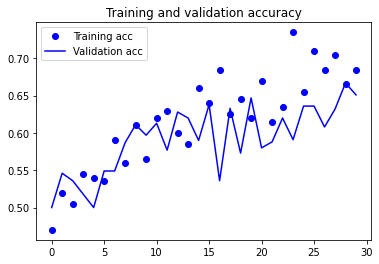

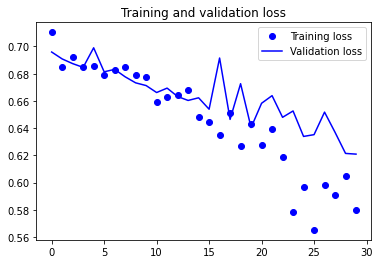

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

These plots are characteristic for overfitting and because there are relatively few training samples (total is 2000), this  is going to be the number-one-concern here. 

The training accuracy increases linearly over time, while the validation accuracy stalls at a lower percentage. The validation loss reaches its minimum after only a few epochs and then stalls, while the training loss keeps decreasing linearly until the bitter end :-).

A number of techniques that can help to fight overfitting are known already. These are dropout and L2 regularization. 
However, a new technique you have learned during the lectures is called `data augmentation` and is used almost universally when processing images with deep learning models.

So let us dive into the second part and see what it can do for us. 

## PART II
### building the CNN using data augmentation

<font color="#C70039">General thougts:</font>
Since overfitting is caused by having too few samples to learn from (leaving a model unable to generalize to new data), hypothetically, given infinite data, a model would be exposed to every possible aspect of that data distribution and in consequence it  would never overfit. 

Data augmentation takes this idea and generates more training data from existing training samples, by "augmenting" the samples via a number of random transformations that yield *believable*-looking images. 
The goal is that at training time, the model would never see the exact same picture twice. This helps the model get exposed to more aspects of the data and generalize much better. 

In Keras, configuring a number of random transformations on training images can easily be performed by using the `ImageDataGenerator` instance, that was introduced earlier already. Here an example:

In [ ]:
data_aug_gen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

These are just a few of the options available (for more information, see the Keras documentation or external resources such as: https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/ ). Let's look at them in more detail:

* `rotation_range` is a value in degrees (0-180), a range within which to randomly rotate pictures.
* `width_shift` and `height_shift` are ranges (as a fraction of total width or height) within which to randomly translate pictures vertically or horizontally.
* `shear_range` is for randomly applying shearing transformations.
* `zoom_range` is for randomly zooming inside pictures.
* `horizontal_flip` is for randomly flipping half of the images horizontally -- relevant when there are no assumptions of horizontal asymmetry (e.g. real-world pictures).
* `fill_mode` is the strategy used for filling in newly created pixels, which can appear after a rotation or a width/height shift.
-----

Let's take a look at the augmented images by picking one and plotting its transformations.

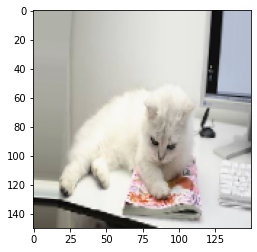

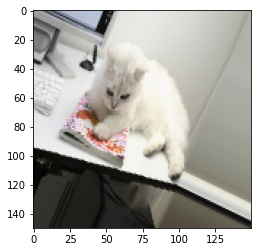

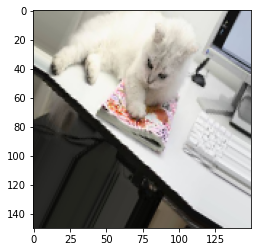

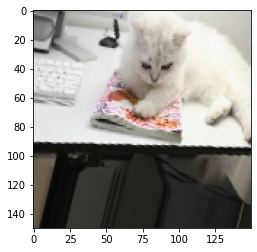

In [ ]:
# This module contains some image preprocessing utilities
from tensorflow.keras.preprocessing import image

all_filenames = [os.path.join(train_cats_dir, fname) for fname in os.listdir(train_cats_dir)]

# Pick one image to "augment": 
'''PLay around and take some others, maybe a dog also.'''
image_picked = all_filenames[666]

# Load that image and resize it
img = image.load_img(image_picked, target_size=(150, 150))

# Convert it to a Numpy array with shape (150, 150, 3), 
# so all three color channels are separated now.
x = image.img_to_array(img)

# Reshape it to (1, 150, 150, 3)
x = x.reshape((1,) + x.shape)

# The .flow() command generates batches of randomly transformed images.
# It will loop indefinitely, so make sure to `break` the loop at some point!
i = 0
for batch in data_aug_gen.flow(x, batch_size=1):
    plt.figure(i) # every image has got its own figure
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

# finally show all transformations
plt.show()

If a new network using data augmentation is trained, that network will never see twice the same input. 
However, the inputs that it sees are still heavily intercorrelated (compare the transformed images above), since they come from a small number of original images.  
It is nearly impossible to produce completely new information, only remixing existing information is an alternative. 
As such, this might not be quite enough to completely get rid of overfitting. 
To further fight overfitting, adding a Dropout layer right before the densely-connected classifier seems to be the right choice.

In [ ]:
from tensorflow.keras import losses
from tensorflow.keras import metrics

model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) # NOTE: dropout is used as well before the FC-layer starts
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

Let's train the network using data augmentation and dropout:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

print("train_dir=",train_dir)
print("validation_dir=",validation_dir)

#chose 10 epochs because of time to load
history = model.fit(
      train_generator,
      steps_per_epoch=10, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
train_dir= /content/drive/MyDrive/Programming/catsdogs/train/train
validation_dir= /content/drive/MyDrive/Programming/catsdogs/train/validation
Epoch 1/10
10/10 [==============================] - 29s 3s/step - loss: 0.6827 - acc: 0.6200 - val_loss: 0.6856 - val_acc: 0.5220
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 0.6879 - acc: 0.5650 - val_loss: 0.6682 - val_acc: 0.5870
Epoch 3/10
10/10 [==============================] - 28s 3s/step - loss: 0.7017 - acc: 0.4950 - val_loss: 0.6717 - val_acc: 0.5940
Epoch 4/10
10/10 [==============================] - 27s 3s/step - loss: 0.6885 - acc: 0.5350 - val_loss: 0.6767 - val_acc: 0.5340
Epoch 5/10
10/10 [==============================] - 27s 3s/step - loss: 0.6916 - acc: 0.5350 - val_loss: 0.6772 - val_acc: 0.5310
Epoch 6/10
10/10 [==============================] - 27s 3s/step - loss: 0.6751 - acc: 0.5900 - val_loss: 0.6783 - val_acc:

In [ ]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


Let's save the model again. 

In [ ]:
model.save('cats_dogs_classification_CNN_with_data_augmentation.h5')

In [ ]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Let's plot the results again using the history object.

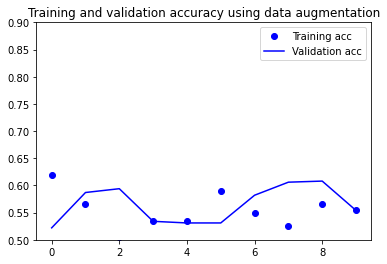

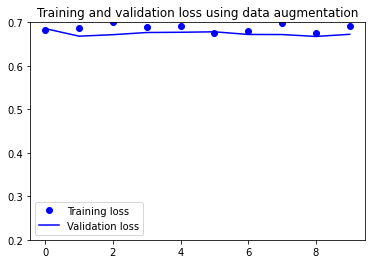

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.ylim((0.5,0.9))
plt.title('Training and validation accuracy using data augmentation')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.ylim((0.2,0.7))
plt.title('Training and validation loss using data augmentation')
plt.legend()

plt.show()

Thanks to data augmentation and dropout, overfitting is reduced almost completely. 
The training curves are rather closely tracking the validation curves. 
With these methods it was possible to reach a much higer accuracy and this a high relative improvement compared to the non-regularized model.

By leveraging regularization techniques even further and by tuning the network's hyperparameters (such as the number of filters per convolution layer, or the number of layers in the network), it will be possible to get an even better accuracy, likely up to 86-87%. 

For this purpose, you may consider using "weights and biases" (https://wandb.ai/site/sweeps), which allows for automatic, scalable, customizable hyperparameter tuning in a few lines of python code. 

### <font color="#C70039">Include the result table of your test plan here (see task list)</font>


4. given: batch_size=20 and size of training and validation data set.<br>
   Your task: Calculate 
    * steps_per_epoch = train_lenght/batch size = 100
    * validation_steps= val_lenght/batch size = 50
    


5. given: batch_size=32 and size of training and validation data set.<br>
    Your task: Calculate
    * steps_per_epoch= 62,5 = 63
    * validation_steps= 31,25 = 31



6. the original data set has got a total of 25.000 images (12.500 cats and 12.500 dogs, respectively).<br>
    Your task is to develop a test plan of the following kind:
    * take a randomly chosen stack of 4000 training, 2000 validation and 1000 testing images. Make sure that no image is used 
      twice in training and validation or testing. Change the hyperparameters accordingly.
      * <font color="red">NOTE:</font> make sure you save your model under different names every time you create a new one.




In [ ]:
# Directory with the training cat pictures
train_cats_dir_2 = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir_2):
    os.mkdir(train_cats_dir_2)

# Directory with the training dog pictures
train_dogs_dir_2 = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir_2):
    os.mkdir(train_dogs_dir_2)

# Directory with the validation cat pictures
validation_cats_dir_2 = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir_2):
    os.mkdir(validation_cats_dir_2)

# Directory with the validation dog pictures
validation_dogs_dir_2 = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir_2):
    os.mkdir(validation_dogs_dir_2)

# Directory with the test cat pictures
test_cats_dir_2 = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir_2):
    os.mkdir(test_cats_dir_2)

# Directory with the test dog pictures
test_dogs_dir_2 = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir_2):
    os.mkdir(test_dogs_dir_2)

In [ ]:
# Copy first 2000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir_2, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 1000 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir_2, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 3500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir_2, fname)
    shutil.copyfile(src, dst)
    
# Copy first 2000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir_2, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1000 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(2000, 3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir_2, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 3500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir_2, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir_2)))
print('total training dog images:', len(os.listdir(train_dogs_dir_2)))
print('--------------------------')
print('total validation cat images:', len(os.listdir(validation_cats_dir_2)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir_2)))
print('--------------------------')
print('total testing cat images:', len(os.listdir(test_cats_dir_2)))
print('total testing dog images:', len(os.listdir(test_dogs_dir_2)))
print('--------------------------')

total training cat images: 2000
total training dog images: 2000
--------------------------
total validation cat images: 1500
total validation dog images: 1500
--------------------------
total testing cat images: 1000
total testing dog images: 1000
--------------------------


In [ ]:
#build model
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be [0,1] standardized
train_datagen = ImageDataGenerator(rescale=1.0/255)
valid_datagen = ImageDataGenerator(rescale=1.0/255)

training_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since binary_crossentropy loss is used, binary labels are needed
        class_mode='binary')

validation_generator = valid_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 4000 images belonging to 2 classes.
Found 3000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            training_generator,
            steps_per_epoch=200,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=100)

In [ ]:
model.save('cats_dogs_classification_CNN_double_train_data.h5')

- take a randomly chosen stack of 6000 training, 3000 validation and 1000 testing images. Make sure that no image is used 
twice in training and validation or testing. Change the hyperparameters accordingly.

In [ ]:
# Directory with the training cat pictures
train_cats_dir_3 = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir_3):
    os.mkdir(train_cats_dir_3)

# Directory with the training dog pictures
train_dogs_dir_3 = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir_3):
    os.mkdir(train_dogs_dir_3)

# Directory with the validation cat pictures
validation_cats_dir_3 = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir_3):
    os.mkdir(validation_cats_dir_3)

# Directory with the validation dog pictures
validation_dogs_dir_3 = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir_3):
    os.mkdir(validation_dogs_dir_3)

# Directory with the test cat pictures
test_cats_dir_3 = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir_3):
    os.mkdir(test_cats_dir_3)

# Directory with the test dog pictures
test_dogs_dir_3 = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir_3):
    os.mkdir(test_dogs_dir_3)

In [ ]:
# Copy first 3000 cat images to train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir_3, fname)
    shutil.copyfile(src, dst)

# Copy NEXT 1500 cat images to validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(3000, 4500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir_3, fname)
    shutil.copyfile(src, dst)
    
# Copy NEXT 500 cat images to test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(4500, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir_3, fname)
    shutil.copyfile(src, dst)
    
# Copy first 3000 dog images to train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(3000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir_3, fname)
    shutil.copyfile(src, dst)
    
# Copy next 1500 dog images to validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(3000, 4500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir_3, fname)
    shutil.copyfile(src, dst)
    
# Copy next 500 dog images to test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(4500, 5000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir_3, fname)
    shutil.copyfile(src, dst)

In [ ]:
print('total training cat images:', len(os.listdir(train_cats_dir_3)))
print('total training dog images:', len(os.listdir(train_dogs_dir_3)))
print('--------------------------')
print('total validation cat images:', len(os.listdir(validation_cats_dir_3)))
print('total validation dog images:', len(os.listdir(validation_dogs_dir_3)))
print('--------------------------')
print('total testing cat images:', len(os.listdir(test_cats_dir_3)))
print('total testing dog images:', len(os.listdir(test_dogs_dir_3)))
print('--------------------------')

In [ ]:
#build model
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
            training_generator,
            steps_per_epoch=300,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=150)

In [ ]:
model.save('cats_dogs_classification_CNN_triple_train_data.h5')

7. Do a hyperparameter optimization. Change the CNN's architecture according to your personal test plan. Store the performance values in a table as the one shown above, at the very end of the notebook. 

## NOTE: 

Aufgrund extremst langer Ladezeiten, wurde die Datenmenge auf weniger Samples pro Durchlauf verringert.

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))

#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [ ]:
history = model.fit(
            training_generator,
            steps_per_epoch=10,
            epochs=5,
            validation_data=validation_generator,
            validation_steps=50)

Epoch 1/5
10/10 [==============================] - 30s 3s/step - loss: 0.8623 - acc: 0.4350 - val_loss: 0.6942 - val_acc: 0.5160
Epoch 2/5
10/10 [==============================] - 27s 3s/step - loss: 0.6952 - acc: 0.5000 - val_loss: 0.7019 - val_acc: 0.5010
Epoch 3/5
10/10 [==============================] - 27s 3s/step - loss: 0.6948 - acc: 0.5300 - val_loss: 0.6983 - val_acc: 0.5070
Epoch 4/5
10/10 [==============================] - 27s 3s/step - loss: 0.6838 - acc: 0.5200 - val_loss: 0.6796 - val_acc: 0.5700
Epoch 5/5
10/10 [==============================] - 27s 3s/step - loss: 0.6802 - acc: 0.5700 - val_loss: 0.6634 - val_acc: 0.6360


| type of method | loss function | optimizer | val. accuracy | comment
| :-: | :-: | :-: | :-: | :-: |
| classification | binary_crossentropy | rmsprop|0.4980 | ausgangswert | 
| classification | binary_crossentropy | rmsprop|0.5780 | 3rd conv-layer 256 | 
| classification | binary_crossentropy | rmsprop|0.5010 | add conv-layer 256 | 
| classification | binary_crossentropy | rmsprop|0.6260 | 2 conv-layer 64  | 
| classification | binary_crossentropy | rmsprop|0.6250| 2 conv layer 128 & 128 | 
| classification | binary_crossentropy | rmsprop|0.6360 | 2 conv layer 64 & 128 | 

anhand der Tabelle ist zu erkennen, dass bei 2 Convolutional layer à 64 & 128 die validation accuracy am besten ist und einen Wert von 63 % aufweist. aufgrund der niedrigen Datenmenge konnte keine bessere validtion accuracy erreicht werden. 

### First step: Binary Classification

The dataset contains images of bees and waps. The number of images of each class is balanced, therefore they are suitable for a binary classification. In total there are XXXX training data, XXXX validation data and XXX test data. 


